In [1]:
# Import libraries for analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt

# For visualizations we will use ggplot stlye and Century Gothic as font family
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Century Gothic' 

## 1. Data pre-processing

In [2]:
# Read the dataset with information from Jan 2018 - Dec 2023
electric_generation_df = pd.read_csv('Datasets/electric_generation_cenace_2018-2023.csv')

# Show the first rows
electric_generation_df.head()

,Sistema,Dia,Hora,Eolica,Fotovoltaica,Biomasa,Carboelectrica,Ciclo Combinado,Combustion Interna,Geotermoelectrica,Hidroelectrica,Nucleoelectrica,Termica Convencional,Turbo Gas
0,SEN,01/01/2018,1,2011.459,0.002,0.5,1556.899,13810.784,253.347,652.024,1209.802,1559.356,2194.831,1260.146
1,SEN,01/01/2018,2,2094.547,0.002,0.5,1390.476,13418.647,250.156,652.780,894.253,1558.983,2113.131,1259.139
2,SEN,01/01/2018,3,2167.033,0.002,0.5,1426.063,13135.631,243.973,652.352,634.724,1559.136,1791.094,1260.314
3,SEN,01/01/2018,4,2304.586,0.002,0.5,1492.343,12255.299,238.626,652.928,565.830,1558.887,1765.838,1260.384
4,SEN,01/01/2018,5,2490.570,0.002,0.5,1495.034,11597.024,233.251,652.543,561.136,1559.366,1716.508,1272.913


In [3]:
# Columns information
electric_generation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sistema               52584 non-null  object 
 1   Dia                   52584 non-null  object 
 2   Hora                  52584 non-null  int64  
 3   Eolica                52584 non-null  float64
 4   Fotovoltaica          52584 non-null  float64
 5   Biomasa               52584 non-null  float64
 6   Carboelectrica        52584 non-null  float64
 7   Ciclo Combinado       52584 non-null  float64
 8   Combustion Interna    52584 non-null  float64
 9   Geotermoelectrica     52584 non-null  float64
 10  Hidroelectrica        52584 non-null  float64
 11  Nucleoelectrica       52584 non-null  float64
 12  Termica Convencional  52584 non-null  float64
 13  Turbo Gas             52584 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 5.6+ MB


In [4]:
# Check if there are missing values
electric_generation_df.isnull().sum()

Sistema                 0
Dia                     0
Hora                    0
Eolica                  0
Fotovoltaica            0
Biomasa                 0
Carboelectrica          0
Ciclo Combinado         0
Combustion Interna      0
Geotermoelectrica       0
Hidroelectrica          0
Nucleoelectrica         0
Termica Convencional    0
Turbo Gas               0
dtype: int64

In [5]:
pd.set_option('display.float_format', '{:.3f}'.format)

# Transform 'Dia' column to a datetime format
electric_generation_df['Dia'] = pd.to_datetime(electric_generation_df['Dia'], dayfirst=True)

# Rename 'Dia' column to 'Fecha'
electric_generation_df.rename(columns={'Dia':'Fecha'}, inplace=True)

# Add a new column in the dataframe just with the year
electric_generation_df['Año'] = electric_generation_df['Fecha'].dt.year

# Add a new column with the total energy produced per hour
electric_generation_df['Total (MWh)'] = electric_generation_df.iloc[:, 3:14].sum(axis=1).astype(float)

# Show the updated dataframe
electric_generation_df.head()

,Sistema,Fecha,Hora,Eolica,Fotovoltaica,Biomasa,Carboelectrica,Ciclo Combinado,Combustion Interna,Geotermoelectrica,Hidroelectrica,Nucleoelectrica,Termica Convencional,Turbo Gas,Año,Total (MWh)
0,SEN,2018-01-01,1,2011.459,0.002,0.500,1556.899,13810.784,253.347,652.024,1209.802,1559.356,2194.831,1260.146,2018,24509.150
1,SEN,2018-01-01,2,2094.547,0.002,0.500,1390.476,13418.647,250.156,652.780,894.253,1558.983,2113.131,1259.139,2018,23632.614
2,SEN,2018-01-01,3,2167.033,0.002,0.500,1426.063,13135.631,243.973,652.352,634.724,1559.136,1791.094,1260.314,2018,22870.822
3,SEN,2018-01-01,4,2304.586,0.002,0.500,1492.343,12255.299,238.626,652.928,565.830,1558.887,1765.838,1260.384,2018,22095.223
4,SEN,2018-01-01,5,2490.570,0.002,0.500,1495.034,11597.024,233.251,652.543,561.136,1559.366,1716.508,1272.913,2018,21578.847


## 2. Data Visualization

### 2.1 Electric Generation from 2018 to 2023

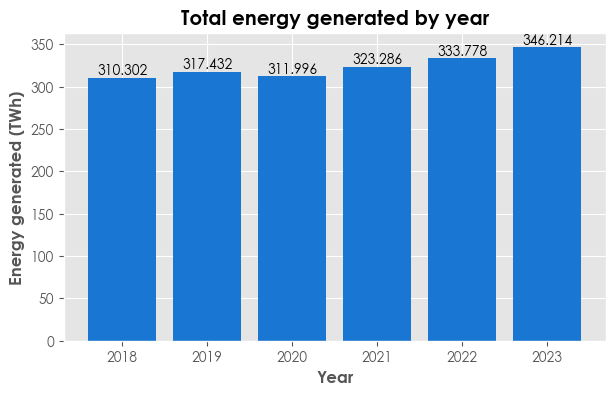

In [6]:
# 1. Total energy generated by year in Mexico from 2018-2023 (TWh)
energy_by_year = electric_generation_df.groupby(by='Año')['Total (MWh)'].sum().div(1e6)

# Show visualization
fig, ax = plt.subplots(figsize=(7,4))
energy_by_year_plot = ax.bar(energy_by_year.index, energy_by_year.values, color='#1976D2')

plt.title('Total energy generated by year', fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Energy generated (TWh)', fontweight = 'bold')
plt.bar_label(energy_by_year_plot)
plt.show()

In [7]:
# 2. Total energy generated by technology from 2018 to 2023
# List with the technologies that produces electrical energy in Mexico
technologies = ['Eolica','Fotovoltaica','Biomasa','Carboelectrica','Ciclo Combinado',
               'Combustion Interna','Geotermoelectrica','Hidroelectrica','Nucleoelectrica',
               'Termica Convencional','Turbo Gas']
generation_by_technology = electric_generation_df.groupby(by='Año')[technologies].sum().div(1e6)
generation_by_technology

,Eolica,Fotovoltaica,Biomasa,Carboelectrica,Ciclo Combinado,Combustion Interna,Geotermoelectrica,Hidroelectrica,Nucleoelectrica,Termica Convencional,Turbo Gas
Año,,,,,,,,,,,
2018,12.441,2.171,0.078,27.365,160.561,2.555,4.988,32.207,13.200,40.440,14.296
2019,16.700,8.394,0.107,21.611,172.747,3.171,4.979,23.570,10.879,38.950,16.324
2020,19.680,13.517,0.090,12.509,183.653,2.872,4.507,26.803,10.863,23.375,14.127
2021,21.046,17.070,0.099,8.704,184.339,2.058,4.198,34.692,11.605,23.199,16.275
2022,20.302,16.287,0.095,14.192,193.995,1.844,4.369,35.551,10.539,21.117,15.487
2023,20.695,18.210,0.097,14.247,203.587,3.635,4.113,20.549,12.043,31.183,17.855


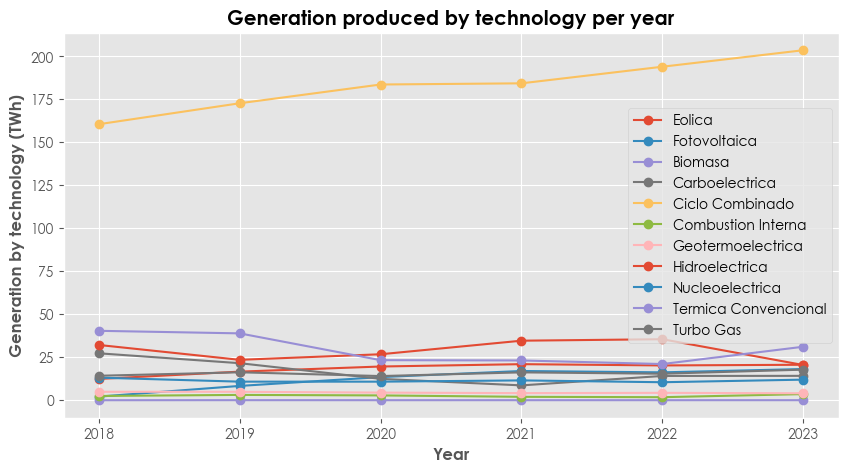

In [8]:
# Plot results
generation_by_technology.plot(kind='line', marker='o', figsize=(10, 5))
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Generation by technology (TWh)', fontweight = 'bold')
plt.title('Generation produced by technology per year', fontweight = 'bold')
plt.show()

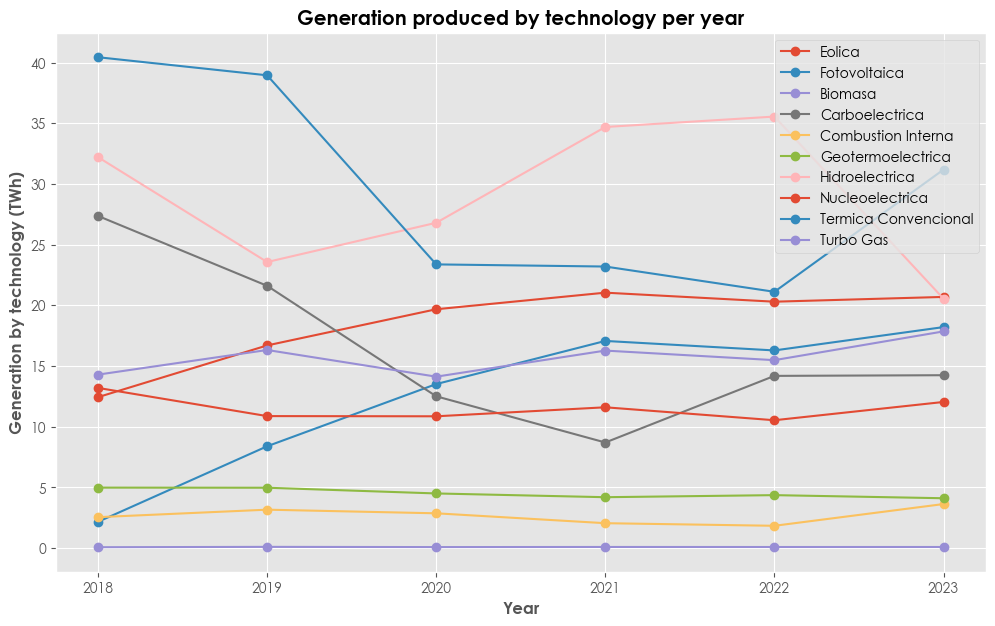

In [9]:
# Lets skip Ciclo combinado, as we know thats the technology which most energy produces in Mexico. 
# Lets focus now in the rest of technologies
tecnologias_no_CicloCombinado = ['Eolica','Fotovoltaica','Biomasa','Carboelectrica','Combustion Interna','Geotermoelectrica','Hidroelectrica','Nucleoelectrica','Termica Convencional','Turbo Gas']
generation_by_technology = electric_generation_df.groupby(by='Año')[tecnologias_no_CicloCombinado].sum().div(1e6)
generation_by_technology.plot(kind='line', marker='o', figsize=(12, 7))
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Generation by technology (TWh)', fontweight = 'bold')
plt.title('Generation produced by technology per year', fontweight = 'bold')
plt.show()

### 2.2 Electric energy generation in 2023

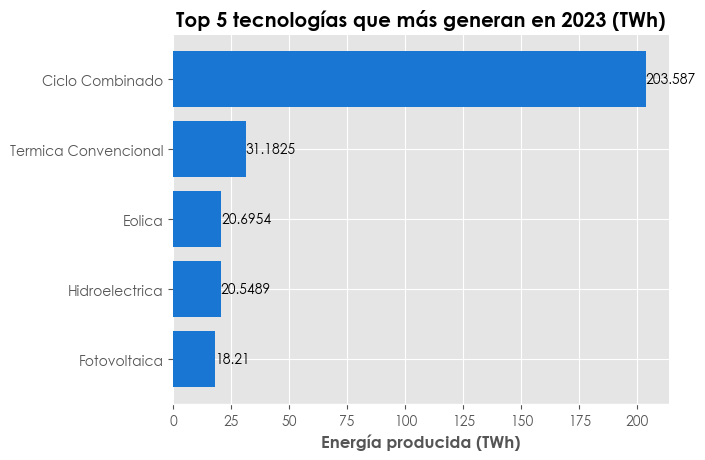

In [10]:
# Top 5 technologies that produced more energy in 2023
generacion_2023 = electric_generation_df[electric_generation_df['Año'] == 2023][technologies].sum().div(1e6).sort_values(ascending=True).tail(5)
fig, ax = plt.subplots()
generacion_2023_plot = ax.barh(generacion_2023.index, generacion_2023.values, color='#1976D2')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Top 5 tecnologías que más generan en 2023 (TWh)', fontweight = 'bold')
plt.xlabel('Energía producida (TWh)', fontweight = 'bold')
plt.bar_label(generacion_2023_plot)
plt.show()

## 3. Data selection

Conclusions: 

* Electric Generation Trend: Visualizations reveal a rising trend in electricity generation, with a notable inflection point in 2020, likely influenced by the COVID-19 pandemic.

* Predominance of Combined Cycle Technology: The analysis emphasizes the dominance of combined cycle technology, contributing to 58.8% of total electricity generation. This highlights the need to focus the neural network model on predicting outcomes specifically for this technology.

* Neural Network Focus: The neural network model will be designed to predict electricity generation for combined cycle plants, leveraging data from the recent three years (2021-2023) to capture contemporary patterns.

In [11]:
# Filter only information from the last 3 years (2021, 2022, 2023)
electric_generation_prediction = electric_generation_df[electric_generation_df['Año'] >= 2021][['Fecha', 'Ciclo Combinado']]
electric_generation_prediction.head()

,Fecha,Ciclo Combinado
26304,2021-01-01,16857.306
26305,2021-01-01,16354.885
26306,2021-01-01,16165.258
26307,2021-01-01,16080.510
26308,2021-01-01,15823.685


In [12]:
# Save preprocessed data
electric_generation_prediction.to_csv('Datasets/electric_generation_model.csv', index=False)